# Digits Classification using Logistic Regression

In [5]:
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split
import numpy as np
!pip install python-mnist


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python3 -m pip install --upgrade pip


## MNIST Dataset

Cơ sở dữ liệu MNIST về chữ số viết tay được xây dựng cho nhiệm vụ phân loại 10 chữ số từ 0 đến 9. Bộ dữ liệu gốc
này bao gồm một tập huấn luyện gồm 60.000 mẫu và một tập kiểm tra gồm 10.000 mẫu. Các hình ảnh được
căn giữa trong một ảnh 28x28. Tuy nhiên, trong các thí nghiệm này, bạn được cung cấp một tập con của bộ dữ liệu này, trong đó
các hình ảnh được
thay đổi kích thước thành 8x8 và số lượng mẫu được giảm xuống còn 1798 mẫu. Tập con này có sẵn trong
gói Scikit-Learn. Bạn có thể tải xuống bằng cách sử dụng các mã sau:

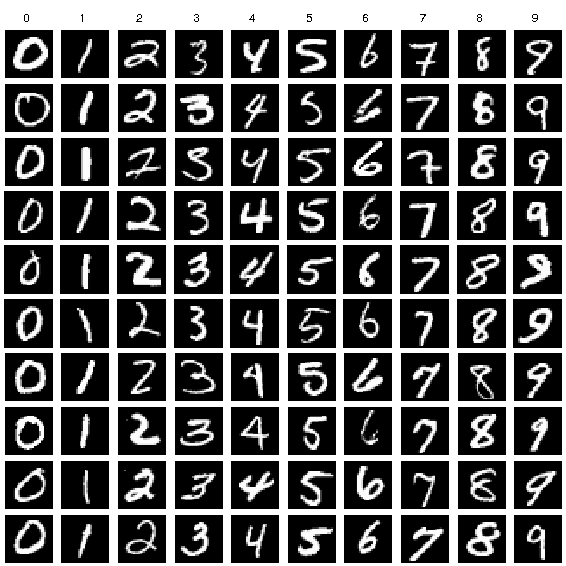

## Import Dataset

In [6]:
digits = datasets.load_digits() 
n_samples = len(digits.images) 
print('The number of samples:', n_samples)

The number of samples: 1797


Số lượng ảnh training: 60000
Kích thước mỗi ảnh (đã làm phẳng): 784 pixels
Số lượng nhãn training: 60000
------------------------------
Số lượng ảnh testing: 10000
Số lượng nhãn testing: 10000


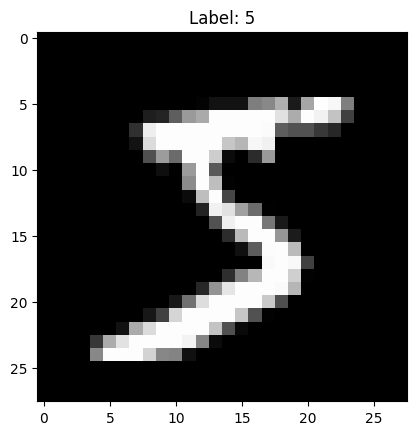

In [ ]:
# Khởi tạo đối tượng MNIST và chỉ đường dẫn đến thư mục chứa file
# Dấu '.' nghĩa là thư mục hiện tại, nơi chứa file notebook
from mnist import MNIST
mndata = MNIST('.')

# Tải dữ liệu training và testing
# Dữ liệu sẽ được tự động đọc từ các file tương ứng
train_images, train_labels = mndata.load_training()
test_images, test_labels = mndata.load_testing()

# Chuyển dữ liệu sang dạng NumPy array để dễ dàng xử lý
train_images = np.array(train_images)
train_labels = np.array(train_labels)
test_images = np.array(test_images)
test_labels = np.array(test_labels)

# In ra để kiểm tra kích thước
print(f"Số lượng ảnh training: {train_images.shape[0]}")
print(f"Kích thước mỗi ảnh (đã làm phẳng): {train_images.shape[1]} pixels") # 784 = 28x28
print(f"Số lượng nhãn training: {train_labels.shape[0]}")

print("-" * 30)

print(f"Số lượng ảnh testing: {test_images.shape[0]}")
print(f"Số lượng nhãn testing: {test_labels.shape[0]}")

# Optional: Hiển thị thử một ảnh để xác nhận
first_image = train_images[0].reshape((28, 28)) # Reshape lại thành ảnh 28x28
plt.imshow(first_image, cmap='gray')
plt.title(f"Label: {train_labels[0]}")
plt.show()


In [ ]:
def display_digits(X, Y):    fig, ax = plt.subplots(nrows=5, ncols=5, figsize=(10, 10))    fig.suptitle( "Display randomly images of the training data set")    for i in range(5):        for j in range(5):            ind = np.random.randint(X.shape[0])            tmp = X[ind, :]# .reshape(8, 8)            ax[i,j].set_title("Label: {}".format(Y[ind]))            ax[i,j].imshow(tmp, cmap='gray_r')            plt.setp(ax[i,j].get_xticklabels(), visible=False)            plt.setp(ax[i,j].get_yticklabels(), visible=False)    fig.subplots_adjust(hspace=0.5, wspace=0.5) 
The number of samples: 1797 
Shape of digit samples: (1797, 8, 8) 
In [5]: # Split data into 50% train and 50% test subsets X_train, X_test, y_train, y_test = train_test_split(digits.images,                                                     digits.target,                                                     test_size=0.2,                                                     random_state=200,                                                    shuffle=False) display_digits(X_train, y_train) 
As the digits data set contains 8x8 features, this might be a challenging task. It is tough to understand the
structure and keep the overview of the digits data. In addition, the data with only two or three dimensions are
easier to grasp and can also be visualized easily. That all explains why you’re going to visualize the data with the
help of one of the Dimensionality Reduction techniques, namely Principal Component Analysis (PCA). The idea
in PCA is to find a linear combination of the two variables that contains most of the information. This new